<div style="display: flex; justify-content: center;">
  <img src="UCL_image_logo.webp"
       style="width: 100%; height: auto; border-radius:10px; background-color:#f0f0f0;">
</div>

<h1 style="background-color:lightgreen; color:#1D6B00; text-align:center; padding:10px; border-radius:8px;">
    <b>UCL 2021–22 | Goal Scorer Analysis</b>
</h1>

<h2 style="background-color:lightgreen; color:#1D6B00;padding:10px; border-radius:8px;" >
Importing Libararies
</h2>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h3 style="background-color:lightgreen; color:#1D6B00;padding:10px; border-radius:8px;" >
Loading the Dataset
</h3>

In [4]:
df=pd.read_csv(r"C:\Users\GCE PMNA\Documents\Shadil\project\goals.csv")
df.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [5]:
df=df.drop(['serial'],axis=1)
df=df.drop(['player_name'],axis=1)

In [6]:
df.head()

,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [7]:
df.shape

(183, 11)

In [8]:
df.columns


Index(['club', 'position', 'goals', 'right_foot', 'left_foot', 'headers',
       'others', 'inside_area', 'outside_areas', 'penalties', 'match_played'],
      dtype='object')

In [9]:
df.describe(include='object')

,club,position
count,183,183
unique,32,3
top,Chelsea,Midfielder
freq,13,78


In [10]:
df.describe()

,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,2.021858,0.972678,0.693989,0.327869,0.021858,1.814208,0.207650,0.196721,6.841530
std,2.005367,1.400281,1.140810,0.612722,0.146621,1.923943,0.514137,0.549315,2.568196
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000
75%,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,8.000000
max,15.000000,11.000000,8.000000,3.000000,1.000000,13.000000,3.000000,3.000000,13.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   club           183 non-null    object
 1   position       183 non-null    object
 2   goals          183 non-null    int64 
 3   right_foot     183 non-null    int64 
 4   left_foot      183 non-null    int64 
 5   headers        183 non-null    int64 
 6   others         183 non-null    int64 
 7   inside_area    183 non-null    int64 
 8   outside_areas  183 non-null    int64 
 9   penalties      183 non-null    int64 
 10  match_played   183 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 15.9+ KB


In [12]:
df.groupby('match_played')['goals'].mean()


match_played
1     1.000000
2     1.000000
3     1.222222
4     1.142857
5     1.560000
6     1.750000
7     1.720000
8     2.347826
9     1.615385
10    4.200000
11    3.250000
12    3.666667
13    4.400000
Name: goals, dtype: float64

In [13]:
df.groupby(['club', 'match_played'])['goals'].sum()


club        match_played
Ajax        5                1
            7                5
            8               15
Atalanta    2                1
            4                2
                            ..
Young Boys  6                6
Zenit       1                1
            4                2
            5                2
            6                4
Name: goals, Length: 110, dtype: int64

<h2 style="background-color:lightgreen; color:#1D6B00;padding:10px; text-align:center; border-radius:8px;" >
Data Preparing 
</h2>

<h3 style="background-color:lightgreen; color:#1D6B00;padding:10px; border-radius:8px;" >
Missing Value Checking
</h3>

In [14]:
df.isnull().sum()

club             0
position         0
goals            0
right_foot       0
left_foot        0
headers          0
others           0
inside_area      0
outside_areas    0
penalties        0
match_played     0
dtype: int64

In [15]:
datadict=pd.DataFrame(df.dtypes)
datadict['MissingVal'] =df.isnull().sum()
datadict['NUnique']=df.nunique()
datadict['Count']=df.count()
datadict = datadict.rename(columns={0:'DataType'})
datadict


,DataType,MissingVal,NUnique,Count
club,object,0,32,183
position,object,0,3,183
goals,int64,0,11,183
right_foot,int64,0,9,183
left_foot,int64,0,7,183
headers,int64,0,4,183
others,int64,0,2,183
inside_area,int64,0,10,183
outside_areas,int64,0,4,183
penalties,int64,0,4,183


In [16]:
col_num=df.select_dtypes(include='number')
col_num

,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,15,11,1,3,0,13,2,3,12
1,13,8,3,1,1,13,0,3,10
2,11,3,4,3,1,11,0,1,8
3,8,0,8,0,0,7,1,1,13
4,7,3,1,3,0,7,0,0,6
...,...,...,...,...,...,...,...,...,...
178,1,0,0,1,0,1,0,0,3
179,1,0,0,1,0,1,0,0,3
180,1,0,0,1,0,1,0,0,2
181,1,0,0,1,0,1,0,0,2


<h3 style="background-color:lightgreen; color:#1D6B00;padding:10px; border-radius:8px;" >
Outlayer  Checking
</h3>

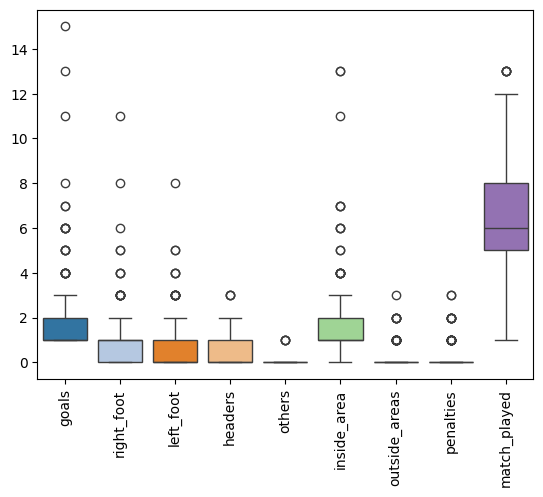

In [17]:

sns.boxplot(data=df, palette="tab20")
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

Keeping The outlayer , all are importent here


<h2 style="background-color:lightgreen; color:#1D6B00;padding:10px; text-align:center; border-radius:8px;" >
Univariate EDA
</h2>

<h3 style="background-color:lightgreen; color:#1D6B00;padding:10px; border-radius:8px;" >
Countplot
</h3>

position
Midfielder    0.426230
Forward       0.398907
Defender      0.174863
Name: proportion, dtype: float64

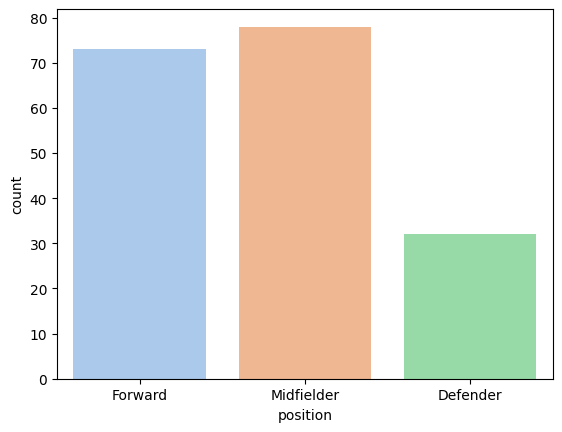

In [18]:
sns.countplot(data=df, x='position', palette='pastel')
df['position'].value_counts(normalize=True)

This chart shows how many players belong to each position and their percentage also.

<h3 style="background-color:lightgreen; color:#1D6B00;padding:10px; border-radius:8px;" >
Violinplot
</h3>

<Axes: ylabel='inside_area'>

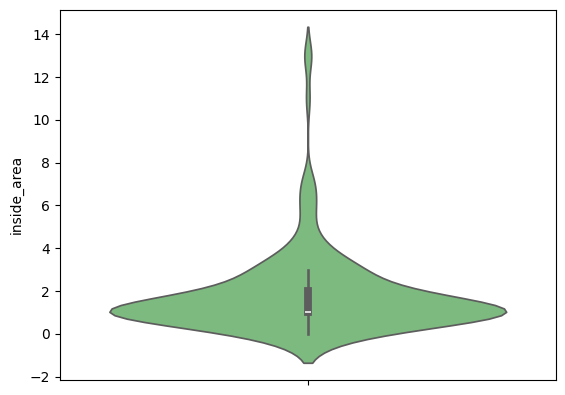

In [21]:
sns.violinplot(data=df, y='inside_area', palette='Greens')


This violin plot shows the distribution and density of goals scored inside the penalty area.

<h3 style="background-color:lightgreen; color:#1D6B00;padding:10px; border-radius:8px;" >
Histplot
</h3>

<Axes: xlabel='right_foot', ylabel='Count'>

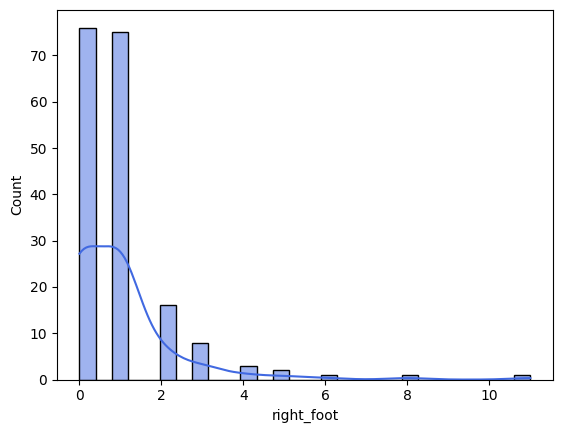

In [22]:
sns.histplot(df['right_foot'], kde=True, color='royalblue')


It shows the distribution of goals scored with the right foot across all players.

<h3 style="background-color:lightgreen; color:#1D6B00;padding:10px; border-radius:8px;" >
KDE Plot
</h3>

<Axes: xlabel='left_foot', ylabel='Density'>

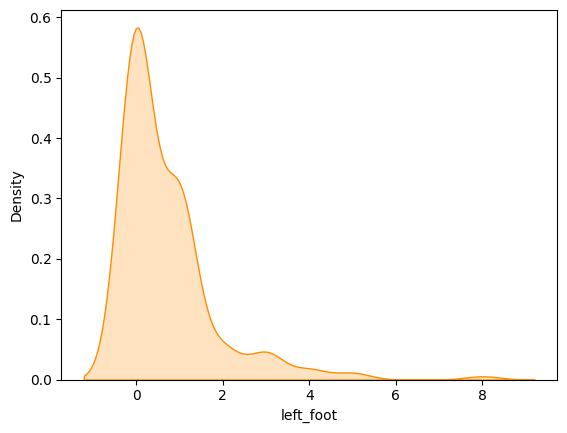

In [23]:
sns.kdeplot(df['left_foot'], fill=True, color='darkorange')


This KDE plot shows how the distribution of left-foot goals is spread across different values

<h3 style="background-color:lightgreen; color:#1D6B00;padding:10px; border-radius:8px;" >
Count Plots for All
</h3>

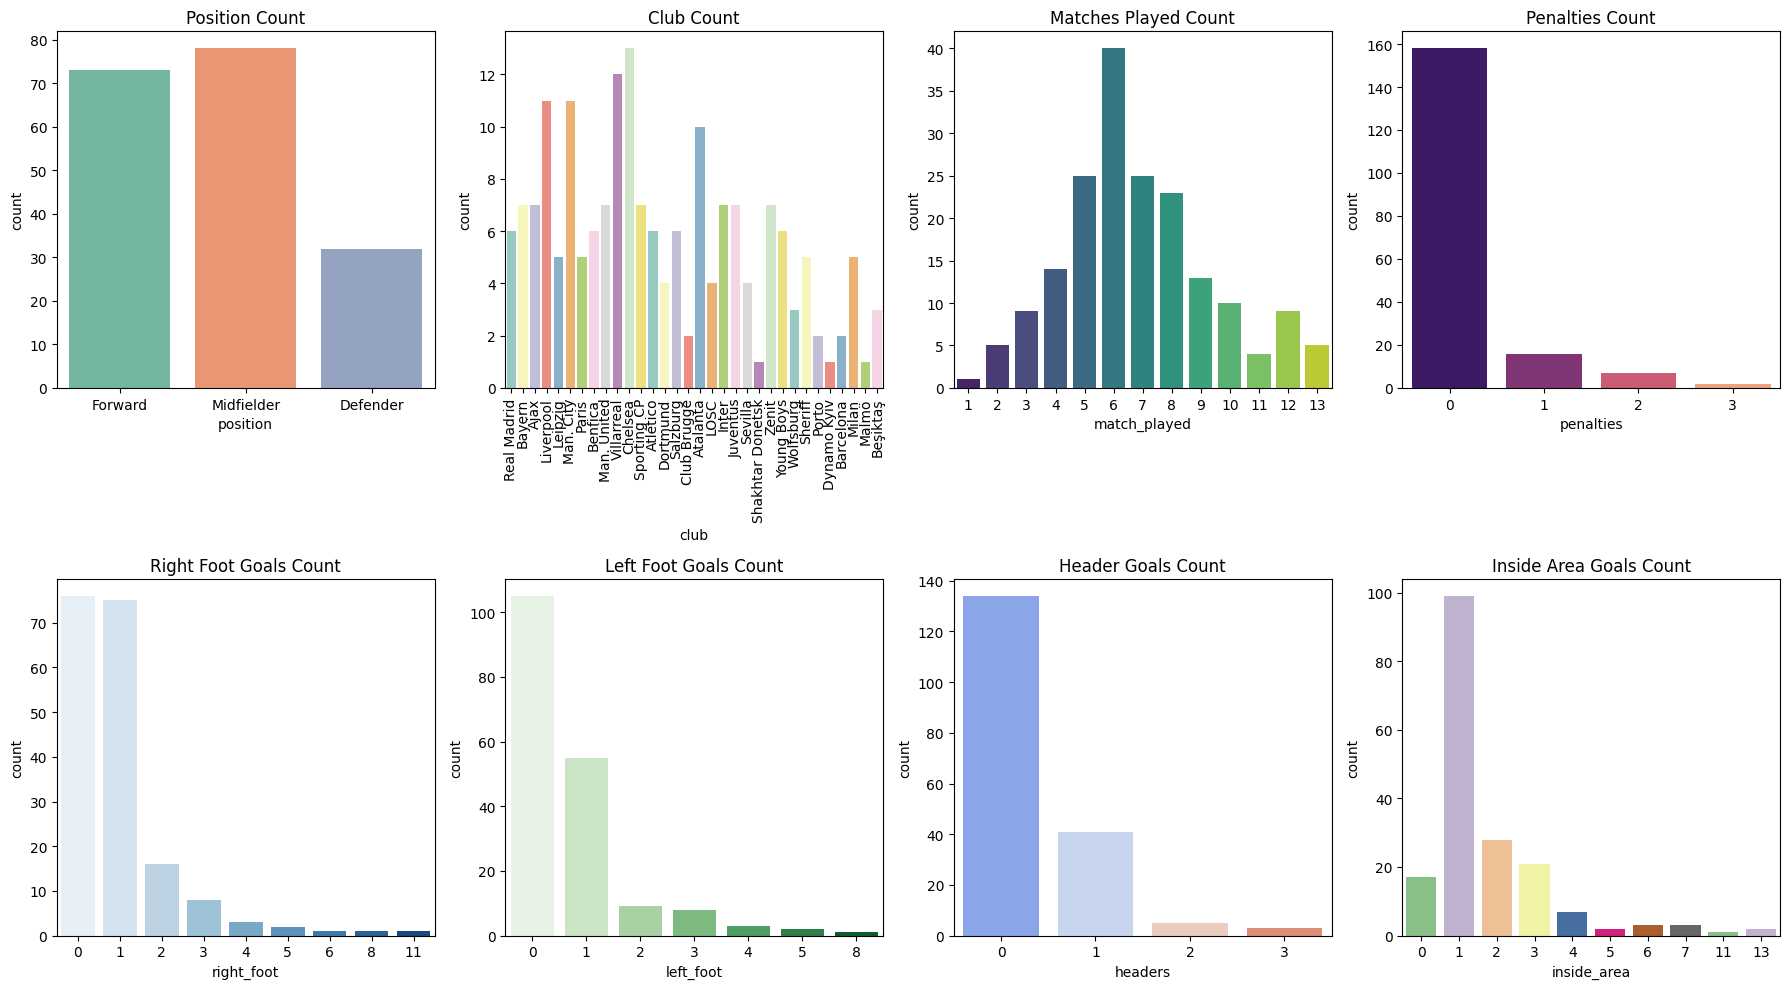

In [25]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
sns.countplot(x='position', data=df, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title("Position Count")
sns.countplot(x='club', data=df, ax=axes[0, 1], palette='Set3')
axes[0, 1].set_title("Club Count")
axes[0, 1].tick_params(axis='x', rotation=90)
sns.countplot(x='match_played', data=df, ax=axes[0, 2], palette='viridis')
axes[0, 2].set_title("Matches Played Count")
sns.countplot(x='penalties', data=df, ax=axes[0, 3], palette='magma')
axes[0, 3].set_title("Penalties Count")
sns.countplot(x='right_foot', data=df, ax=axes[1, 0], palette='Blues')
axes[1, 0].set_title("Right Foot Goals Count")
sns.countplot(x='left_foot', data=df, ax=axes[1, 1], palette='Greens')
axes[1, 1].set_title("Left Foot Goals Count")
sns.countplot(x='headers', data=df, ax=axes[1, 2], palette='coolwarm')
axes[1, 2].set_title("Header Goals Count")
sns.countplot(x='inside_area', data=df, ax=axes[1, 3], palette='Accent')
axes[1, 3].set_title("Inside Area Goals Count")
plt.tight_layout()
plt.show()

This set of plots helping us understand the distribution of player positions, clubs, goal types, and match statistics.

<h2 style="background-color:lightgreen; color:#1D6B00;padding:10px; text-align:center; border-radius:8px;" >
Bivariate EDA
</h2>

<h3 style="background-color:lightgreen; color:#1D6B00;padding:10px; border-radius:8px;" >
Boxplot
</h3>

<Axes: xlabel='position', ylabel='goals'>

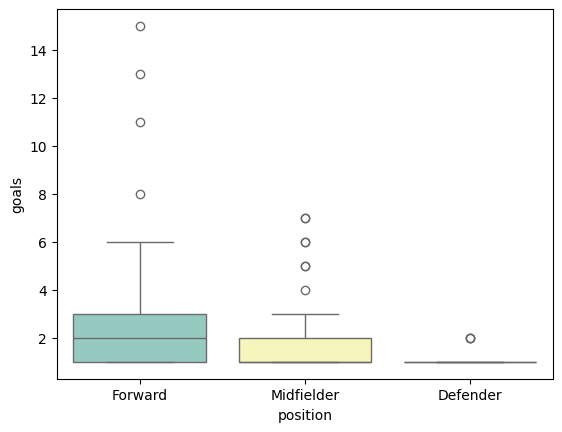

In [ ]:
sns.boxplot(data=df, x='position', y='goals', palette='Set3')


This plot shows the distribution of goals scored for each position and highlights which positions score more.

<h3 style="background-color:lightgreen; color:#1D6B00;padding:10px; border-radius:8px;" >
Scatter Plot
</h3>

<Axes: xlabel='match_played', ylabel='penalties'>

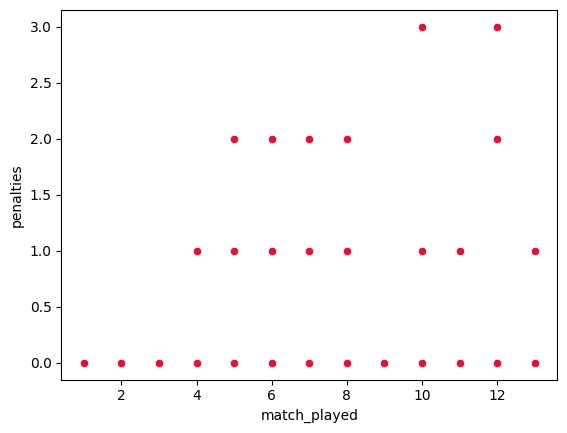

In [ ]:
sns.scatterplot(x='match_played', y='penalties', data=df, color='crimson')


It visualizes whether players who played more matches also won more penalties.

<h3 style="background-color:lightgreen; color:#1D6B00;padding:10px; border-radius:8px;" >
Barplot
</h3>

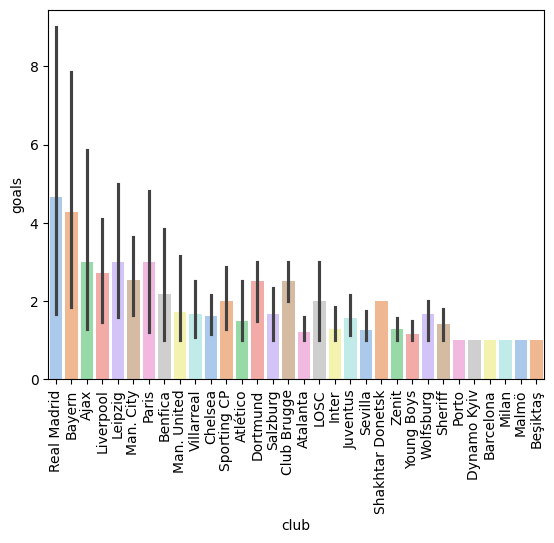

In [39]:
sns.barplot(data=df, x='club', y='goals', palette='pastel')
plt.xticks(rotation=90)
plt.show()


Goal distribution across each clubs

<h3 style="background-color:lightgreen; color:#1D6B00;padding:10px; border-radius:8px;" >
Joint Plot
</h3>

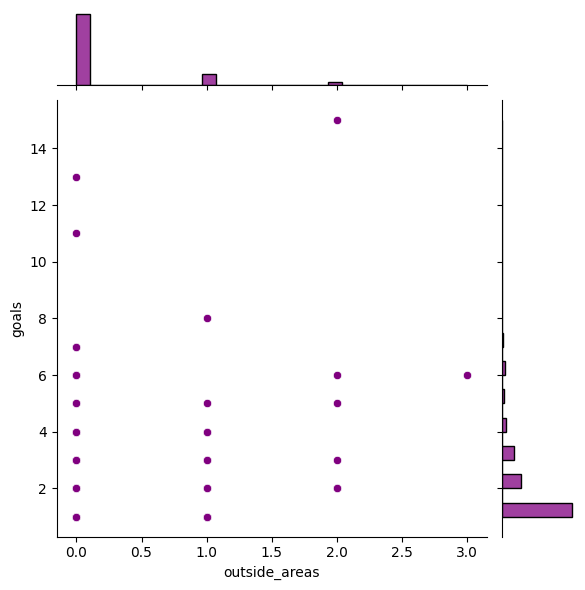

In [26]:
sns.jointplot(data=df, x='outside_areas', y='goals', color='purple')

This joint plot shows the distribution and density of goals scored outside the penalty area

<h3 style="background-color:lightgreen; color:#1D6B00;padding:10px; border-radius:8px;" >
Plots
</h3>

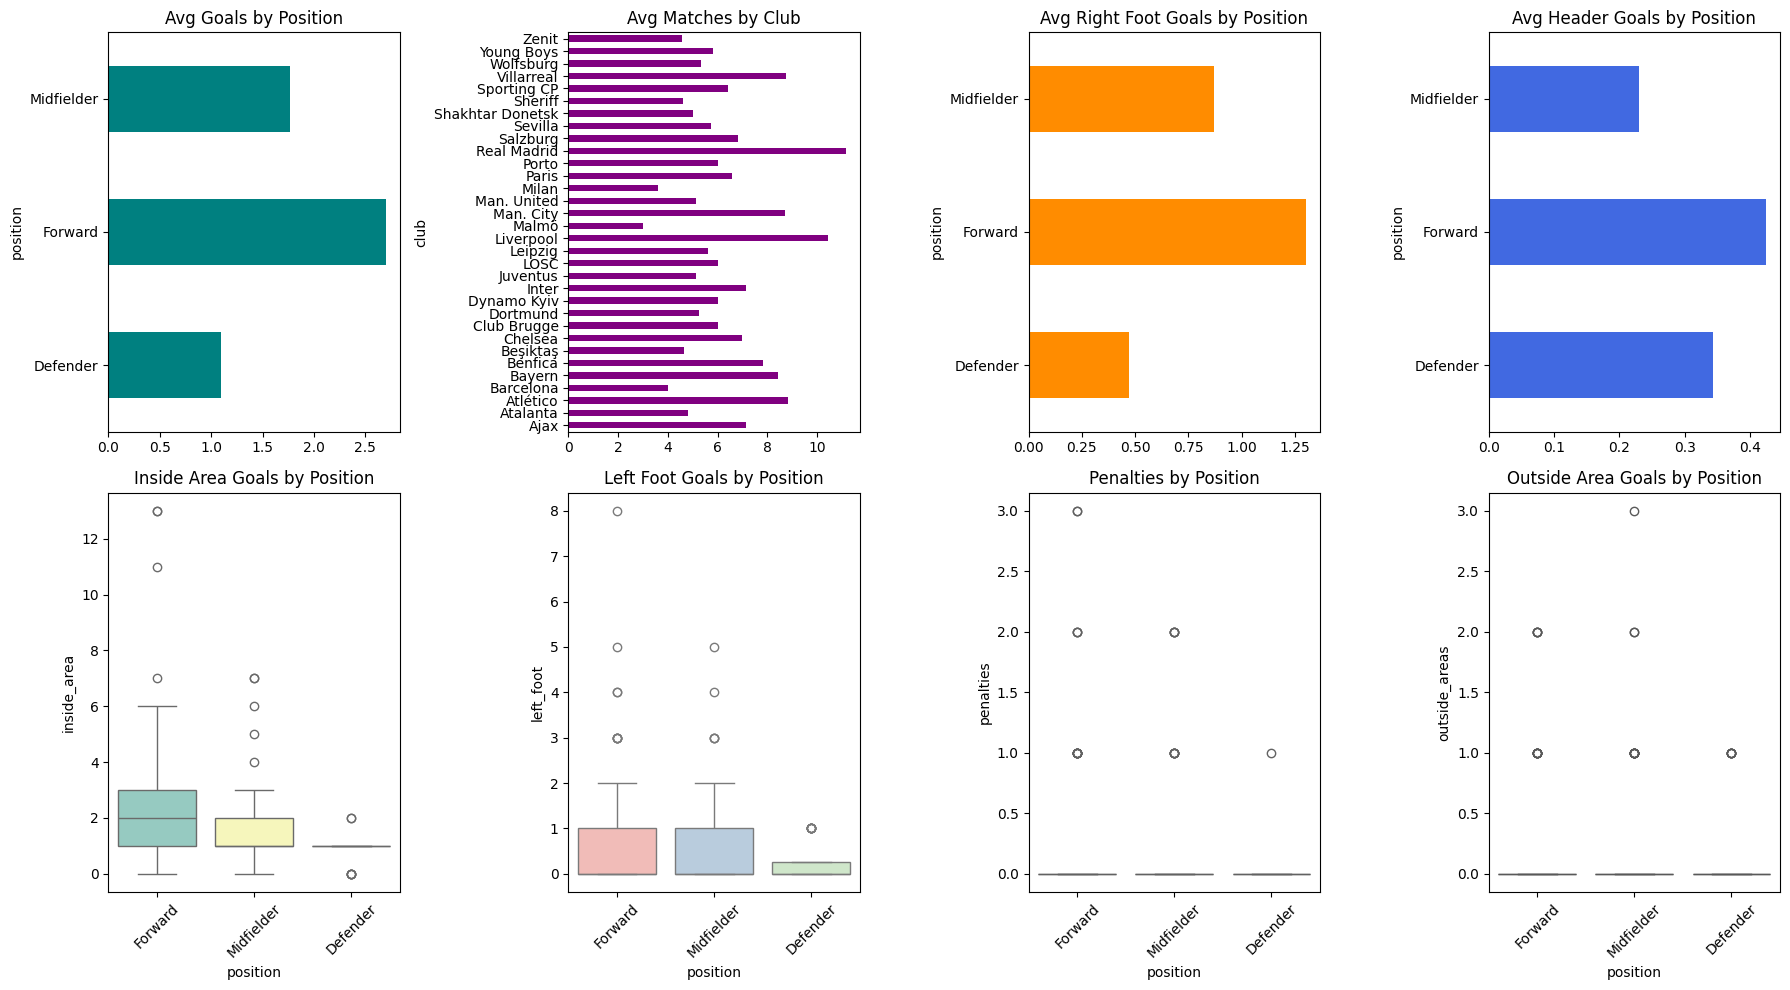

In [27]:
figbi, axesbi = plt.subplots(2, 4, figsize=(18, 10))
df.groupby('position')['goals'].mean().plot(kind='barh', ax=axesbi[0,0], color='teal')
axesbi[0,0].set_title("Avg Goals by Position")
df.groupby('club')['match_played'].mean().plot(kind='barh', ax=axesbi[0,1], color='purple')
axesbi[0,1].set_title("Avg Matches by Club")
df.groupby('position')['right_foot'].mean().plot(kind='barh', ax=axesbi[0,2], color='darkorange')
axesbi[0,2].set_title("Avg Right Foot Goals by Position")
df.groupby('position')['headers'].mean().plot(kind='barh', ax=axesbi[0,3], color='royalblue')
axesbi[0,3].set_title("Avg Header Goals by Position")
sns.boxplot(x="position", y="inside_area", data=df, ax=axesbi[1,0], palette='Set3')
axesbi[1,0].set_title("Inside Area Goals by Position")
axesbi[1,0].tick_params(axis='x', rotation=45)
sns.boxplot(x="position", y="left_foot", data=df, ax=axesbi[1,1], palette='Pastel1')
axesbi[1,1].set_title("Left Foot Goals by Position")
axesbi[1,1].tick_params(axis='x', rotation=45)
sns.boxplot(x="position", y="penalties", data=df, ax=axesbi[1,2], palette='Accent')
axesbi[1,2].set_title("Penalties by Position")
axesbi[1,2].tick_params(axis='x', rotation=45)
sns.boxplot(x="position", y="outside_areas", data=df, ax=axesbi[1,3], palette='Set2')
axesbi[1,3].set_title("Outside Area Goals by Position")
axesbi[1,3].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


These all plots compares average goal-related stats across positions and clubs, and shows how different types of goals vary by player position.

<h2 style="background-color:lightgreen; color:#1D6B00;padding:10px; text-align:center; border-radius:8px;" >
Multivariate EDA
</h2>

<h3 style="background-color:lightgreen; color:#1D6B00;padding:10px; border-radius:8px;" >
Heat Map
</h3>

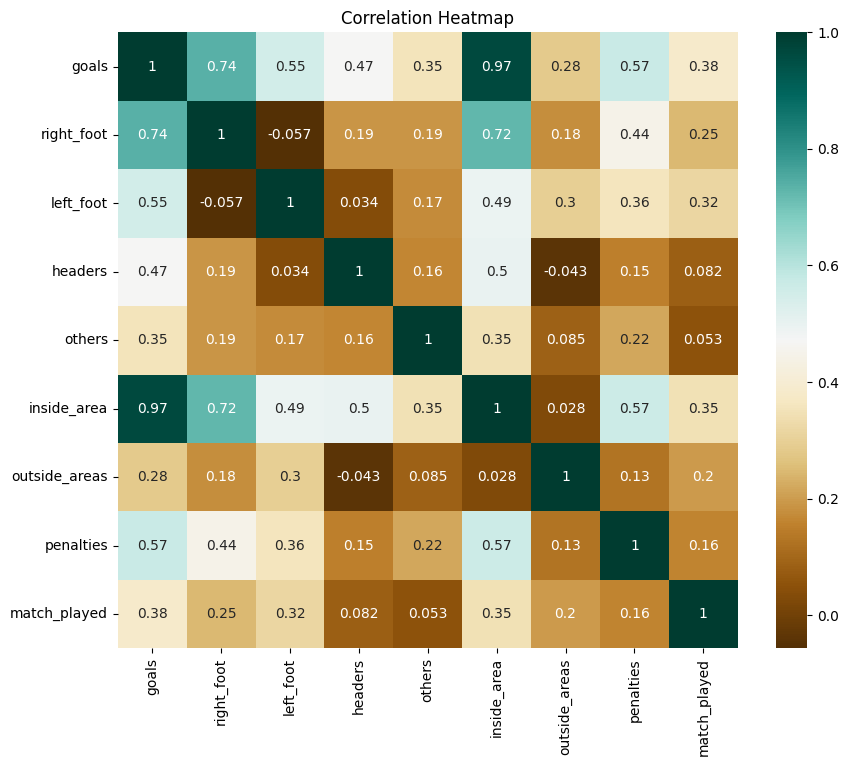

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(col_num.corr(), annot=True,cmap='BrBG')
plt.title("Correlation Heatmap")
plt.show()


This heat map show the correlation between each columns 

<h3 style="background-color:lightgreen; color:#1D6B00;padding:10px; border-radius:8px;" >
Pie Chart
</h3>

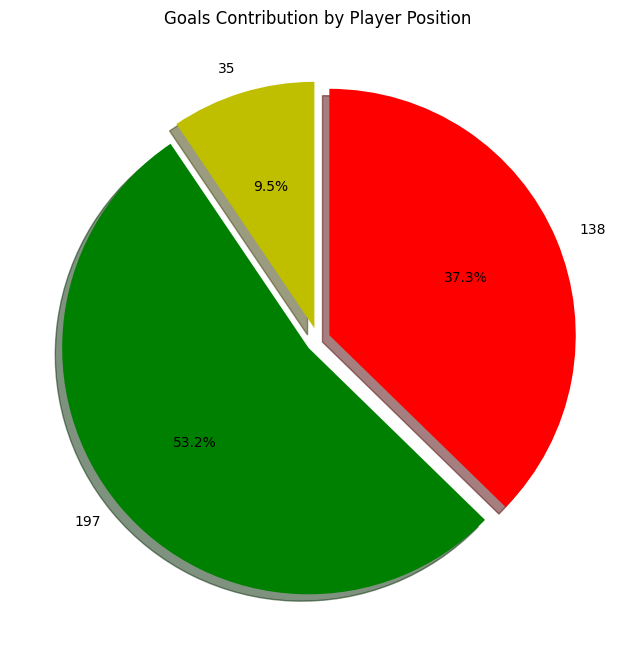

In [38]:
goals_by_position = df.groupby('position')['goals'].sum()

plt.figure(figsize=(8,8))
colors = ["y", 'g','r']
plt.pie(goals_by_position,
        labels=goals_by_position,
        autopct='%1.1f%%',
        startangle=90,
        explode=[0.05]*len(goals_by_position),
        shadow=True,
        colors=colors)

plt.title("Goals Contribution by Player Position")
plt.show()